In [2]:
import snap
from collections import Counter
import matplotlib.pyplot as plt

# Analyzing the Wikipedia voters network

In [3]:
wiki_graph = snap.TNGraph.New()

In [4]:
f = open('..//..//data//data_hw0_1.txt')
for line in f:
    pair = line.split('\t')
    if len(pair)==2 and pair[0].isdigit():
        node_0 = int(pair[0])
        node_1 = int(pair[1])
        if not wiki_graph.IsNode(node_0):
            wiki_graph.AddNode(node_0)
        if  not wiki_graph.IsNode(node_1):
            wiki_graph.AddNode(node_1)
        wiki_graph.AddEdge(node_0, node_1)


In [5]:
print('The number of nodes in the network: {}'.format(wiki_graph.GetNodes()))

The number of nodes in the network: 7115


In [6]:
print('The number of nodes with a self-edge (self-loop): {}'.format(snap.CntSelfEdges(wiki_graph)))

The number of nodes with a self-edge (self-loop): 0


In [7]:
print('The number of directed edges in the network, i.e., the number of ordered pairs: {}'.format(
    wiki_graph.GetEdges()-snap.CntSelfEdges(wiki_graph)))

The number of directed edges in the network, i.e., the number of ordered pairs: 103689


In [8]:
print('The number of undirected edges in the network, i.e., the number of unique unordered pairs: {}'.format(
    snap.CntUniqUndirEdges(wiki_graph)))

The number of undirected edges in the network, i.e., the number of unique unordered pairs: 100762


In [9]:
print('The number of reciprocated edges in the network, i.e., the number of unique unordered pairs of nodes: {}'.format(
snap.CntUniqBiDirEdges(wiki_graph)))

The number of reciprocated edges in the network, i.e., the number of unique unordered pairs of nodes: 2927


In [10]:
print('The number of nodes of zero out-degree: {}'.format(snap.CntOutDegNodes(wiki_graph, 0)))

The number of nodes of zero out-degree: 1005


In [11]:
print('The number of nodes of zero in-degree: {}'.format(snap.CntInDegNodes(wiki_graph, 0)))

The number of nodes of zero in-degree: 4734


In [12]:
InDegV = snap.TIntPrV()
snap.GetNodeOutDegV(wiki_graph, InDegV)
more10 = 0
for item in InDegV:
    if item.GetVal2() > 10:
        more10 += 1
print('The number of nodes with more than 10 outgoing edges (out-degree > 10): {}'.format(more10))

The number of nodes with more than 10 outgoing edges (out-degree > 10): 1612


In [13]:
InDegV = snap.TIntPrV()
snap.GetNodeInDegV(wiki_graph, InDegV)
less10 = 0
for item in InDegV:
    if item.GetVal2() < 10:
        less10 += 1
print('The number of nodes with fewer than 10 incoming edges (in-degree < 10): {}'.format(less10))

The number of nodes with fewer than 10 incoming edges (in-degree < 10): 5165


# Further Analyzing the Wikipedia voters network

In [14]:
OutDegV = snap.TIntPrV()
snap.GetNodeOutDegV(wiki_graph, OutDegV)
out_degree = [i.GetVal2() for i in OutDegV if i.GetVal2()>0]
out_degree_dist = Counter(out_degree)

In [15]:
x_vals = list(out_degree_dist.keys())
y_vals = list(out_degree_dist.values())

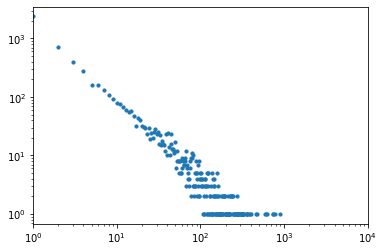

In [16]:
plt.scatter(x_vals, y_vals, s=10)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1, 10000]);

In [17]:
import numpy as np
a, b = np.polyfit(np.log10(x_vals), np.log10(y_vals), 1)
a, b

(-1.281064705674566, 3.132454704499913)

In [18]:
y_val = [10**b*x**a for x in x_vals]

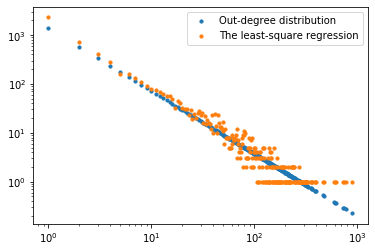

In [19]:
plt.scatter(x_vals, y_val, label='Out-degree distribution', s=10)
plt.scatter(x_vals, y_vals, label='The least-square regression', s=10)
plt.xscale('log')
plt.yscale('log')
plt.legend();

# Finding Experts on the Java Programming Language on StackOverflow

In [20]:
stackoverflow_graph = snap.TNGraph.New()

In [21]:
f = open('..//..//data//data_hw0_2.txt')
for line in f:
    pair = line.split('\t')
    if len(pair)==2 and pair[0].isdigit():
        node_0 = int(pair[0])
        node_1 = int(pair[1])
        if not stackoverflow_graph.IsNode(node_0):
            stackoverflow_graph.AddNode(node_0)
        if  not stackoverflow_graph.IsNode(node_1):
            stackoverflow_graph.AddNode(node_1)
        stackoverflow_graph.AddEdge(node_0, node_1)

In [22]:
Components = snap.TCnComV()
snap.GetWccs(stackoverflow_graph, Components)
print('The number of weakly connected components in the network: {}'.format(Components.Len()))

The number of weakly connected components in the network: 10143


In [23]:
MxWcc = snap.GetMxWcc(stackoverflow_graph)
print('The number of edges and the number of nodes in the largest weakly connected component: {} edges and {} nodes'.format(
    MxWcc.GetEdges(), MxWcc.GetNodes()))

The number of edges and the number of nodes in the largest weakly connected component: 322486 edges and 131188 nodes


In [29]:
PRankH = snap.TIntFltH()
snap.GetPageRank(stackoverflow_graph, PRankH)
pagerank = [(item, PRankH[item]) for item in PRankH]
pagerank.sort(key=lambda x: x[1])
print('IDs of the top 3 most central nodes in the network by PagePank scores: {}, {}, {}'.format(pagerank[-1],pagerank[-2],pagerank[-3]))

IDs of the top 3 most central nodes in the network by PagePank scores: (992484, 0.013980540412209575), (135152, 0.010005538895741885), (22656, 0.007103532693128619)


In [30]:
NIdHubH = snap.TIntFltH()
NIdAuthH = snap.TIntFltH()
snap.GetHits(stackoverflow_graph, NIdHubH, NIdAuthH)
hubs = [(item, NIdHubH[item]) for item in NIdHubH]
hubs.sort(key=lambda x: x[1])
auth = [(item, NIdAuthH[item]) for item in NIdAuthH]
auth.sort(key=lambda x: x[1])
print('IDs of the top 3 hubs in the network by HITS scores: {}, {}, {}'.format(hubs[-1],hubs[-2],hubs[-3]))
print('IDs of the top 3 authorities in the network by HITS scores: {}, {}, {}'.format(auth[-1],auth[-2],auth[-3]))

IDs of the top 3 hubs in the network by HITS scores: (892029, 0.07336380373389548), (1194415, 0.05955074418794487), (359862, 0.05687564588068672)
IDs of the top 3 authorities in the network by HITS scores: (22656, 0.6047239730413133), (157882, 0.2986993488728824), (571407, 0.2839071934144654)
